In [2]:
# 使用するモデルのインポート
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
# その他のモジュールのインポート
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc,
                             confusion_matrix, ConfusionMatrixDisplay)
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint, expon
import random

In [16]:
# ファイルの読み込み、データの格納・欠損値処理・確認
# file_path = "C:/Users/thisi/OneDrive/共有ファイル/リモートデスクトップ/ビニング処理_卒研A.csv"
# file_path = "E:/実験/実験結果/卒研B/データセット/2. 不要特徴量削除/2.不要特徴量削除後 分類テスト.csv"
# file_path = "C:/Users/81806/OneDrive/共有ファイル/リモートデスクトップ/データセット/2. 不要特徴量削除/2.不要特徴量削除後 分類テスト.csv"
# file_path =  "C:/Users/thisi/OneDrive/共有ファイル/リモートデスクトップ/vif_result.csv"
file_path =  "C:/Users/thisi/OneDrive/共有ファイル/卒研B/データ最終版/2. 最終ファイルVIF主成分分析後 (2値sddis追加).csv"
target_column = "SD_dis"
data = pd.read_csv(file_path)
data = data.drop(columns=["SD_con","Interest","Duration_of_first_Visit"])
data = data.fillna(data.mean())
data["readers\'_vocabulary"] = data["readers\'_vocabulary"].round(6)
reader1 = data[data["readers\'_vocabulary"] == 0.761595	]
reader2 = data[data["readers\'_vocabulary"] == 0.303887	]
reader3 = data[data["readers\'_vocabulary"] == 0.733618	]
reader4 = data[data["readers\'_vocabulary"] == 0.307398	]
reader5 = data[data["readers\'_vocabulary"] == -1.418105 ]
reader6 = data[data["readers\'_vocabulary"] == -1.926750 ]
data = reader6
data.info()
X = data.drop(columns=[target_column])
y = data[target_column]

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 468 to 537
Data columns (total 46 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   SD_dis                                                   70 non-null     int64  
 1   readers'_vocabulary                                      70 non-null     float64
 2   Average_duration_of_fixations                            70 non-null     float64
 3   Minimum_duration_of_fixations                            70 non-null     float64
 4   Maximum_duration_of_fixations                            70 non-null     float64
 5   Number_of_fixations                                      70 non-null     float64
 6   Duration_of_first_fixation                               70 non-null     float64
 7   Average_pupil_diameter                                   70 non-null     float64
 8   Average_duration_of_Visit_per_char

In [17]:
data.head()

,SD_dis,readers'_vocabulary,Average_duration_of_fixations,Minimum_duration_of_fixations,Maximum_duration_of_fixations,Number_of_fixations,Duration_of_first_fixation,Average_pupil_diameter,Average_duration_of_Visit_per_character,Minimum_duration_of_Visit,...,Percentage_of_Chinese_words_verb,Percentage_of_Chinese_words_noun,Average_length_of_compund_nouns,Number_of_characters_of_adnominal_modification,Percentage_of_adnominal_modification_out_of_total_nouns,Number_of_adnominal_modification_out_of_total_nouns,Percentage_of_frequent_words,Cossim_model6,Norm_model6,Avecossim_model6
468,0,-1.92675,1.212925,0.812865,0.262040,-0.498839,1.233670,-1.036201,0.316778,-0.259795,...,-0.632238,-1.345875,-0.512313,-0.551506,-0.475971,-0.660962,1.497878,0.398686,-0.158592,0.186861
469,0,-1.92675,4.897598,0.323804,4.531451,-0.804714,1.133351,-1.016423,0.426546,1.815226,...,1.140038,-0.481276,-0.512313,-1.002364,-0.143496,0.315954,0.628663,0.051922,-0.241953,-0.298568
470,0,-1.92675,2.178487,-0.114664,1.025989,-0.009438,1.033031,-1.074688,-0.410402,-0.503123,...,0.475435,-0.481276,-0.311057,1.116671,0.388465,1.292871,0.435505,-0.202128,-0.786909,-0.519319
471,1,-1.92675,1.923223,-0.401354,2.713446,1.152889,2.401677,-1.075698,-0.464695,-0.524796,...,0.829890,-0.481276,0.292712,1.071586,-0.808447,-0.660962,0.145767,0.311412,-0.908325,0.142153
472,0,-1.92675,2.544734,0.172027,0.830167,-0.070613,-0.794219,-0.959226,-0.357700,-0.513631,...,-0.632238,-0.481276,-1.317338,-1.002364,0.055989,-0.660962,1.497878,0.641546,0.052777,0.463593


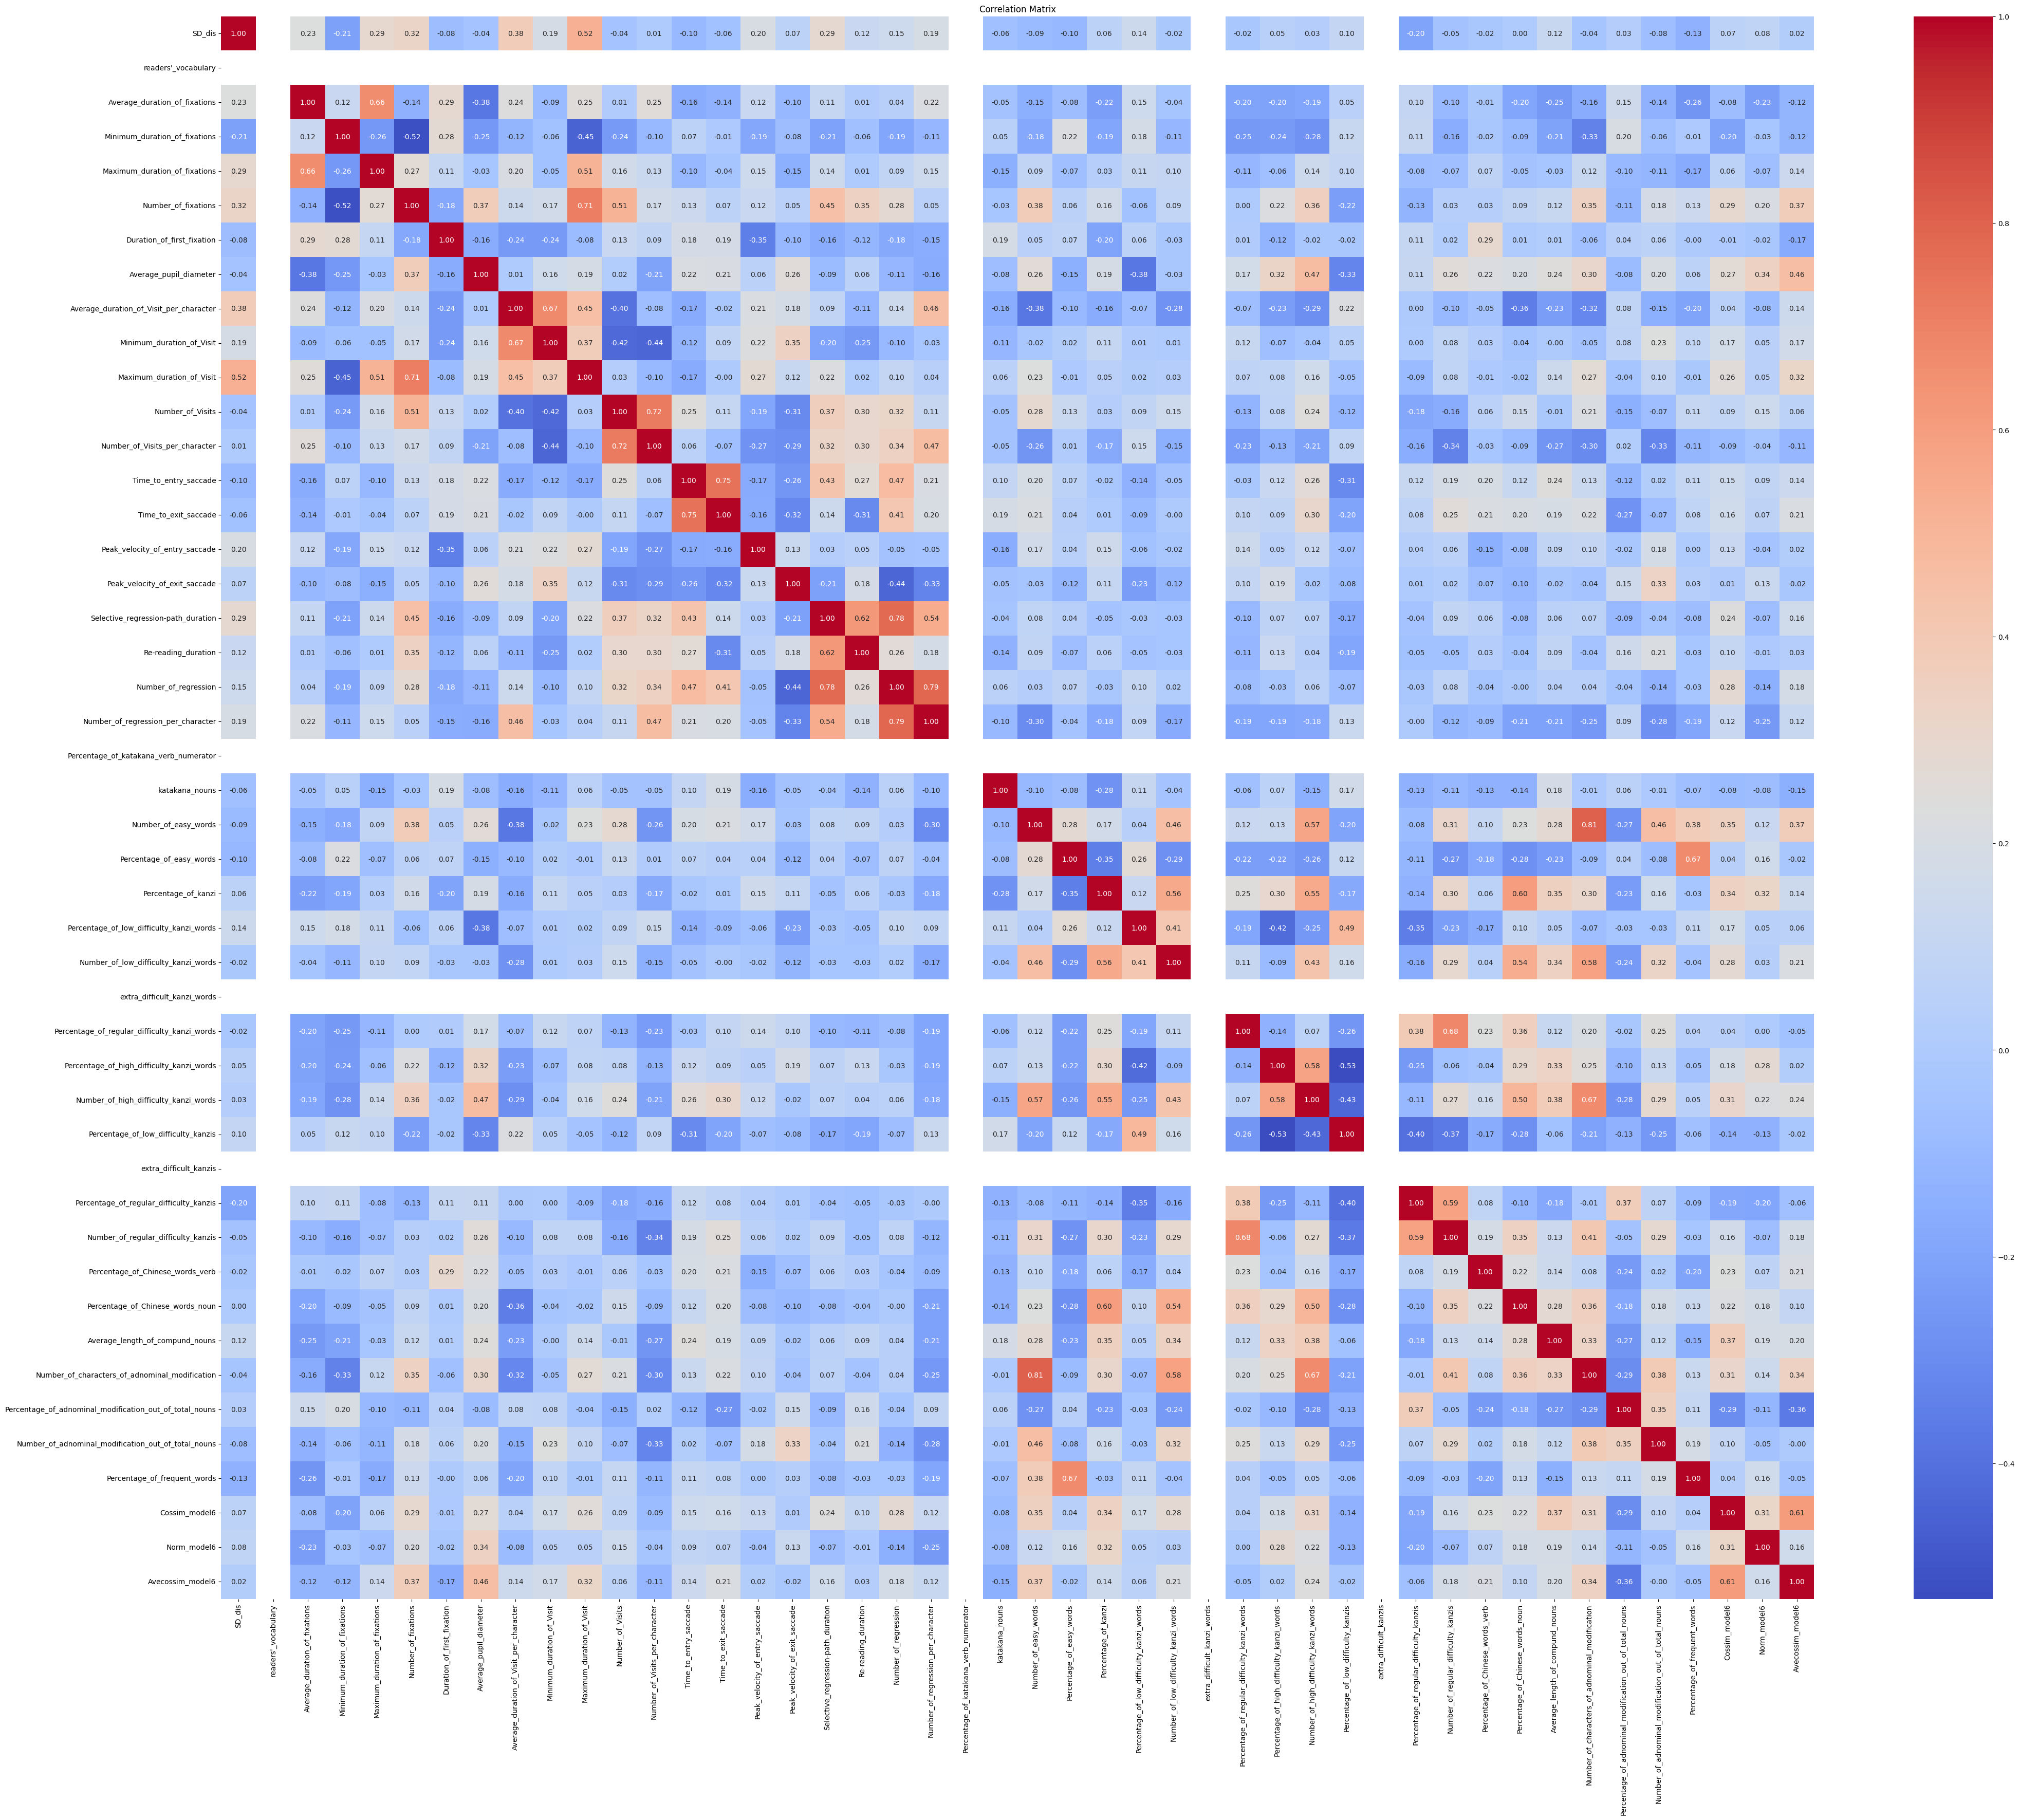

In [18]:
# データの可視化
plt.figure(figsize=(50, 40))
corr_matrix = data.corr('pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# # データの可視化
# plt.figure(figsize=(50, 40))
# corr_matrix = data.corr('spearman')
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title("Correlation Matrix")
# plt.show()

# # 散布図行列は時間かかるのでやりたいときだけ
# sns.pairplot(data)
# plt.title("Scatter Plot Matrix")
# plt.show()

In [19]:
# 特徴量選択
sfs = SFS(RandomForestClassifier(),
          k_features="best",
          forward = False,
          floating= True,
          scoring = 'accuracy',
          cv = 3,
          n_jobs= -1)

sfs = sfs.fit(X, y)

# 選択された特徴量の表示
selected_features = sfs.k_feature_names_
selected_features

('Duration_of_first_fixation',
 'Average_pupil_diameter',
 'Average_duration_of_Visit_per_character',
 'Number_of_Visits',
 'Time_to_entry_saccade',
 'Peak_velocity_of_exit_saccade',
 'Selective_regression-path_duration',
 'Percentage_of_easy_words',
 'Percentage_of_kanzi',
 'Percentage_of_low_difficulty_kanzis',
 'Percentage_of_Chinese_words_verb',
 'Percentage_of_adnominal_modification_out_of_total_nouns')

In [121]:
# specific_feature = ['Maximum_duration_of_Visit',
#  'Number_of_Visits_per_character',
#  'Time_to_entry_saccade',
#  'Number_of_regression',
#  'extra_difficult_kanzi_words',
#  'Percentage_of_regular_difficulty_kanzi_words',
#  'Percentage_of_adnominal_modification_out_of_total_nouns',
#  'Cossim_model6',
#  'Norm_model6']

# sfs = "None"

# type(specific_feature)

In [122]:
# selected_features = X.columns #全特徴量のとき
# selected_features = specific_feature　#特徴量指定したいとき

# 選択された特徴量のみをXに指定
X_slected = X[list(selected_features)]
X_slected.head()

,Number_of_regression,Number_of_regression_per_character,extra_difficult_kanzis,Cossim_model6
138,-0.935274,-0.676369,-0.336929,0.155032
139,-0.935274,-0.676369,-0.336929,0.625053
140,-0.935274,-0.676369,-0.336929,-0.439010
141,-0.451914,-0.236671,-0.336929,-0.039192
142,-0.935274,-0.676369,-0.336929,-0.684659


In [123]:
# 選択された特徴量でモデル構築
X_train, X_test, y_train, y_test = train_test_split(X_slected, y, test_size=0.2, random_state=42, stratify=y)

# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [124]:
# Define StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [125]:

# モデルの構築
base_models = [
        ('log', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('svm', svm.SVC(kernel='rbf', probability=True, random_state=42)),
        ('knn', KNeighborsClassifier()),
        ('mlp', MLPClassifier(random_state=42)),
        ('nb', GaussianNB())
    ]

param_dist = {
    'log__penalty': ["l2"],
    'log__C': randint(1, 3),
    'log__solver': ['lbfgs', 'sag', 'liblinear'],
    'log__max_iter': randint(50, 150),
    'rf__n_estimators': randint(50, 150),
    'rf__criterion': ['gini', 'entropy', 'log_loss'],
    'rf__max_depth': randint(5, 50),
    'rf__min_samples_split': randint(1, 3),
    'rf__min_samples_leaf': uniform(0.01, 1),
    'gb__n_estimators':randint(80, 200),
    'gb__learning_rate': uniform(0.01, 0.3),
    'gb__max_depth':randint(3, 10),
    'gb__min_samples_leaf':randint(1, 5),
    'gb__subsample':uniform(0.5, 1.0),
    'svm__C': uniform(0.01, 100),
    'svm__gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'knn__n_neighbors':randint(2, 7),
    'knn__leaf_size':randint(10, 50),
    'mlp__hidden_layer_sizes': [(100,), (50,), (100, 50)],
    'mlp__alpha': uniform(0.0001, 0.01),
    'mlp__max_iter': randint(100, 300),
    'nb__var_smoothing': [1e-9, 5e-9, 1e-8],
    'final_estimator__C' : randint(1, 3),
    'final_estimator__max_iter' : randint(50, 150),
    'final_estimator__penalty' : ["l2"],
    'final_estimator__solver' : ['lbfgs', 'sag', 'liblinear']
}

meta_model = LogisticRegression(random_state=42)

stacking_model = StackingClassifier(estimators=base_models,
                                     final_estimator=meta_model,
                                       cv=3)


In [ ]:
# ランダムサーチの実行
random_search = RandomizedSearchCV(estimator=stacking_model,
                                   param_distributions=param_dist,
                                   n_iter=300,
                                   cv=3,
                                   scoring='accuracy',
                                   random_state=42)

random_search.fit(X_train_scaled, y_train)
print(random_search.best_params_)

c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (249) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (249) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (249) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (249) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_netw

In [100]:
# 最終モデルの構築
final_model = random_search.best_estimator_
final_model.fit(X_train_scaled, y_train)

c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (153) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (153) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (153) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (153) reached and the optimization hasn't converged yet.
  warnings.warn(


StackingClassifier(cv=3,
                   estimators=[('log',
                                LogisticRegression(C=2, max_iter=116,
                                                   random_state=42,
                                                   solver='sag')),
                               ('rf',
                                RandomForestClassifier(criterion='log_loss',
                                                       max_depth=44,
                                                       min_samples_leaf=0.0804161308495439,
                                                       n_estimators=81,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.29908599312677586,
                                                           min_samples_leaf=4,
                                                           n_estimators=142,
                                                           rand...
                                SVC(C=67.12435168240506, gamma='auto',
                                    probability=True, random_state=42)),
                               ('knn',
                                KNeighborsClassifier(leaf_size=41,
                                                     n_neighbors=2)),
                               ('mlp',
                                MLPClassifier(alpha=0.005668012624583502,
                                              hidden_layer_sizes=(100, 50),
                                              max_iter=153, random_state=42)),
                               ('nb', GaussianNB(var_smoothing=5e-09))],
                   final_estimator=LogisticRegression(C=2, max_iter=102,
                                                      random_state=42,
                                                      solver='liblinear'))

Accuracy: 0.9285714285714286
Precision: 0.9285714285714286
Recall: 0.9285714285714286
F1 Score: 0.9285714285714286


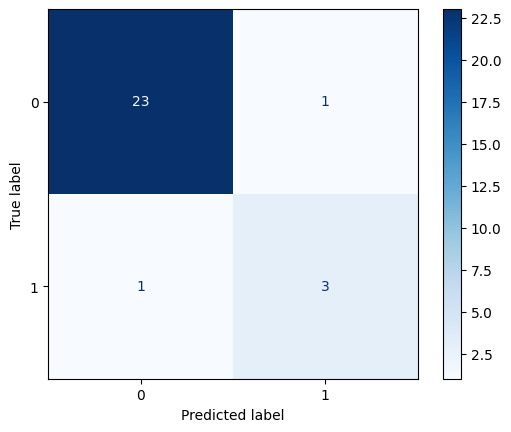

In [101]:
# 最終モデルのテストデータへの適用および性能評価
y_pred = final_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')
plt.show()

In [102]:
print("ROC:",roc_auc_score(y_test, y_pred))

ROC: 0.8541666666666667


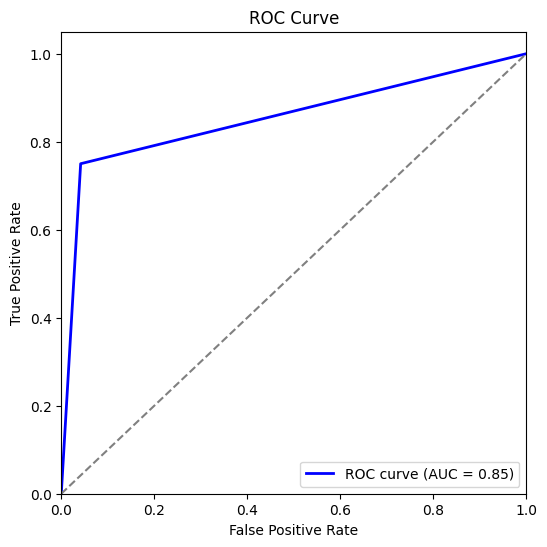

In [103]:
# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [104]:
cv_clf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Compare base models
Model_accuracy = {}
for name, model in random_search.best_estimator_.estimators:
    scores = cross_val_score(model, X, y, cv=cv_clf, scoring='accuracy')
    Model_accuracy[f"{name}"] = scores.mean()
    print(f"{name} Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

# Evaluate stacking model
stacking_scores = cross_val_score(final_model, X, y, cv=cv_clf, scoring='accuracy')
print(f"Stacking Model Accuracy: {stacking_scores.mean():.4f} (+/- {stacking_scores.std():.4f})")

log Accuracy: 0.8556 (+/- 0.0377)


c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


rf Accuracy: 0.8550 (+/- 0.0026)
gb Accuracy: 0.8844 (+/- 0.0419)
svm Accuracy: 0.8907 (+/- 0.0343)
knn Accuracy: 0.8479 (+/- 0.0134)


c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (153) reached and the optimization hasn't converged yet.
  warnings.warn(


mlp Accuracy: 0.8698 (+/- 0.0421)
nb Accuracy: 0.7362 (+/- 0.2594)


c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (153) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\s

Stacking Model Accuracy: 0.8693 (+/- 0.0297)


In [105]:
# 各モデルの特徴量重要度をPFIとSHAPで算出
from sklearn.inspection import permutation_importance
import shap

# 訓練データ(X_train, y_train)を用いてモデルをフィットします
for name, model in random_search.best_estimator_.estimators:
    model.fit(X_train, y_train)


c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (153) reached and the optimization hasn't converged yet.
  warnings.warn(


In [106]:

PFIs = {}
for name, model in random_search.best_estimator_.estimators:
    pfi = permutation_importance(model, X_train, y_train, random_state=42)
    # 特徴量の名前と重要度をセットにした辞書を作成
    feature_importances = {X_train.columns[i]: pfi.importances_mean[i] for i in range(len(X_train.columns))}
    PFIs[f'{name}'] = feature_importances

# 結果の確認
for model_name, importances in PFIs.items():
    print(f"Model: {model_name}")
    for feature, importance in importances.items():
        print(f"  {feature}: {importance:.4f}")


Model: log
  Maximum_duration_of_fixations: 0.0145
  Number_of_fixations: 0.0618
  Percentage_of_regular_difficulty_kanzi_words: 0.0000
  Number_of_regular_difficulty_kanzis: -0.0018
  Percentage_of_Chinese_words_verb: 0.0036
  Percentage_of_Chinese_words_noun: 0.0036
  Cossim_model6: 0.0000
Model: rf
  Maximum_duration_of_fixations: 0.0000
  Number_of_fixations: 0.0000
  Percentage_of_regular_difficulty_kanzi_words: 0.0000
  Number_of_regular_difficulty_kanzis: 0.0000
  Percentage_of_Chinese_words_verb: 0.0000
  Percentage_of_Chinese_words_noun: 0.0000
  Cossim_model6: 0.0000
Model: gb
  Maximum_duration_of_fixations: 0.0455
  Number_of_fixations: 0.1291
  Percentage_of_regular_difficulty_kanzi_words: 0.0000
  Number_of_regular_difficulty_kanzis: 0.0000
  Percentage_of_Chinese_words_verb: 0.0218
  Percentage_of_Chinese_words_noun: 0.0345
  Cossim_model6: 0.0073
Model: svm
  Maximum_duration_of_fixations: 0.0509
  Number_of_fixations: 0.1145
  Percentage_of_regular_difficulty_kanzi_wor

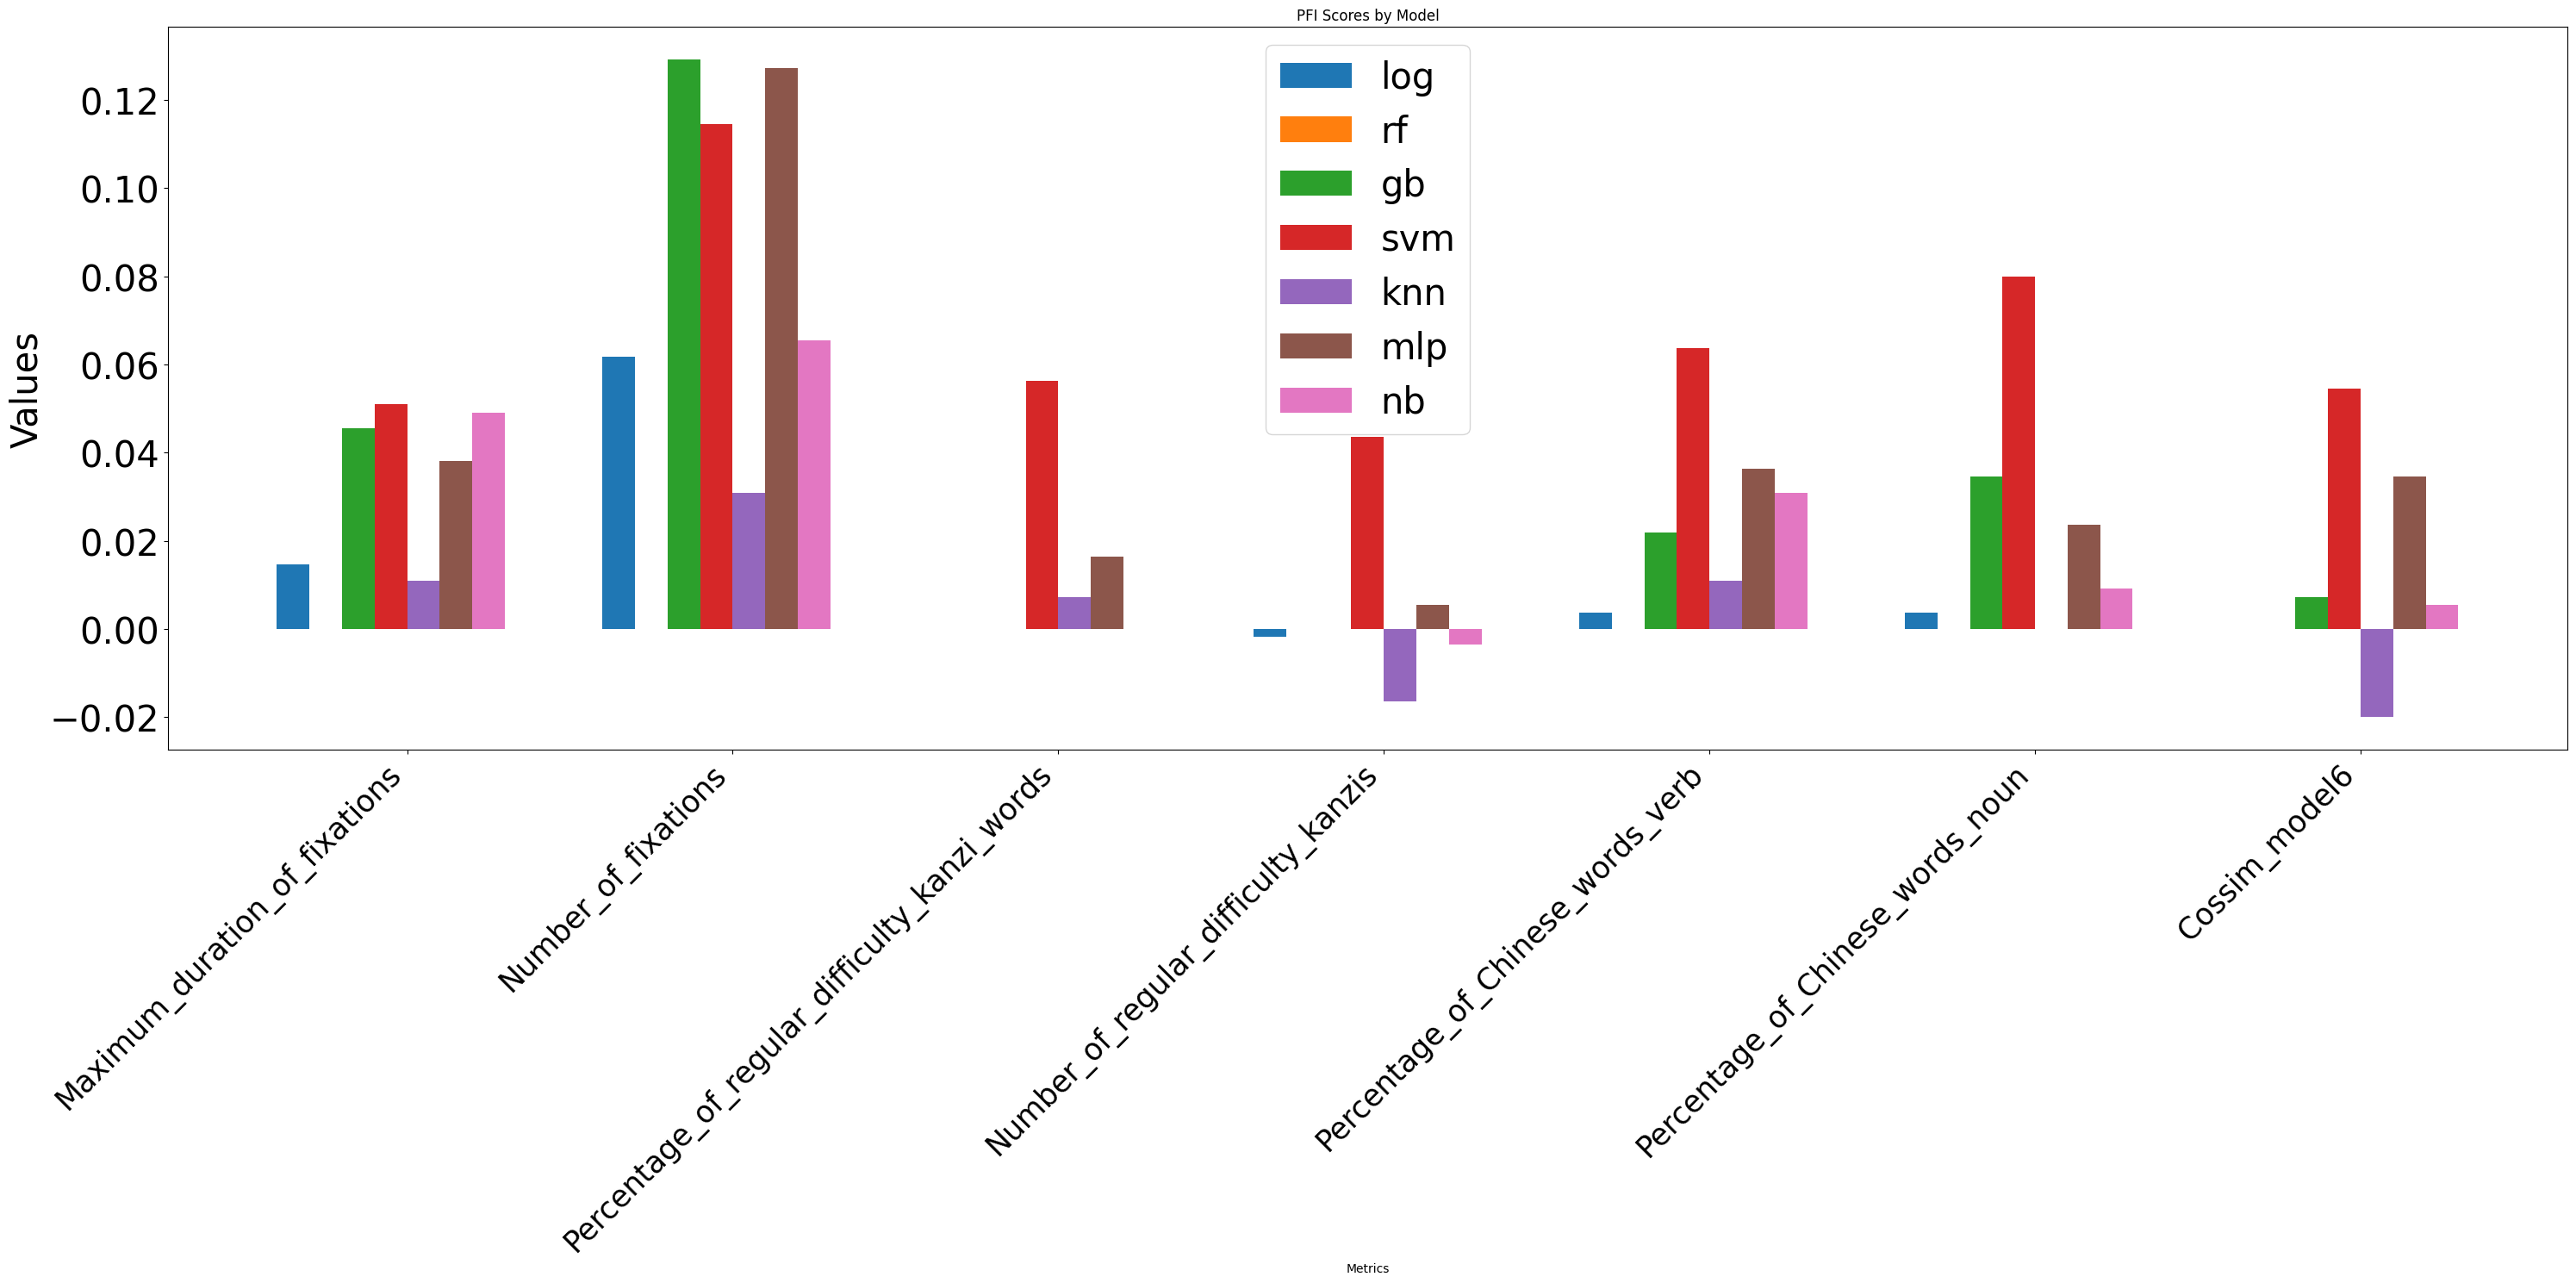

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# 指標のリスト（全モデル共通）
metrics = list(PFIs["log"].keys())
num_metrics = len(metrics)
num_models = len(PFIs.keys())

# グラフの準備
x = np.arange(num_metrics)  # X軸の位置
width = 0.1  # バーの幅

fig, ax = plt.subplots(figsize=(30, 15))

# 各モデルごとにバーを描画
for i, (model, values) in enumerate(PFIs.items()):
    ax.bar(x + i * width, values.values(), width, label=model)

# 軸ラベルと凡例
ax.set_xlabel("Metrics")
ax.set_ylabel("Values", fontsize=30)
ax.set_title("PFI Scores by Model")
ax.set_xticks(x + width * (num_models / 2))
# ax.set_yticklabels(values, fontsize=30)
ax.tick_params(axis='y', labelsize=30)
ax.set_xticklabels(metrics, rotation=45, ha="right", fontsize=25)
ax.legend(fontsize=30, loc='best')

plt.tight_layout()
plt.show()


Using 110 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 110/110 [00:04<00:00, 23.45it/s]


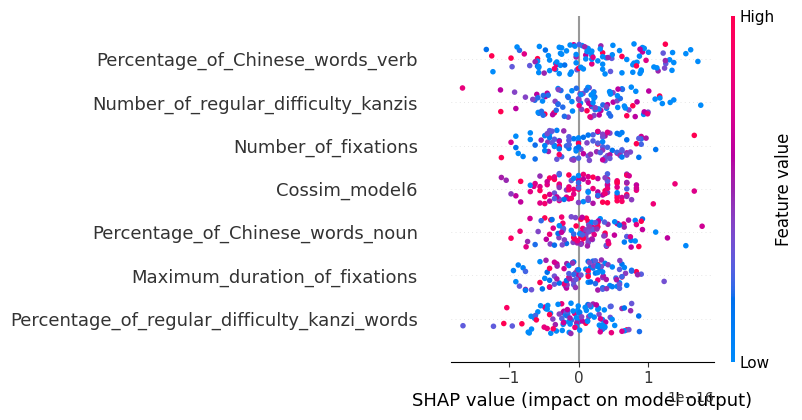

Using 110 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 110/110 [00:06<00:00, 17.02it/s]


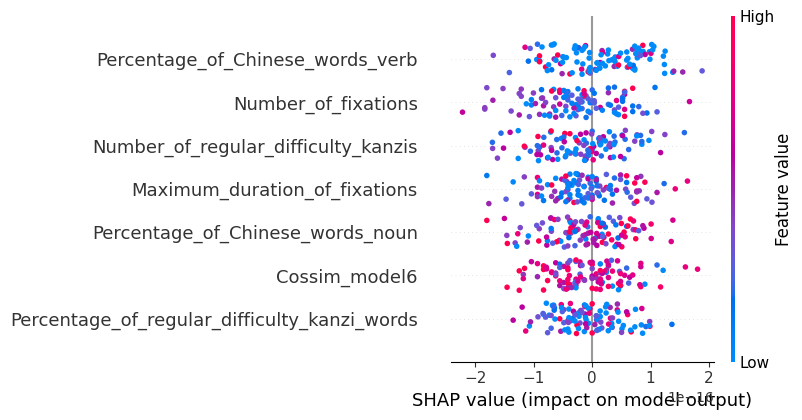

Using 110 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 110/110 [00:05<00:00, 18.78it/s]


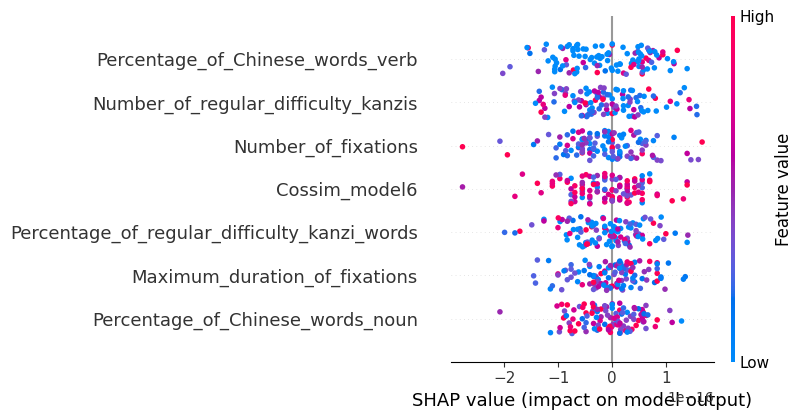

Using 110 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 110/110 [00:10<00:00, 10.45it/s]


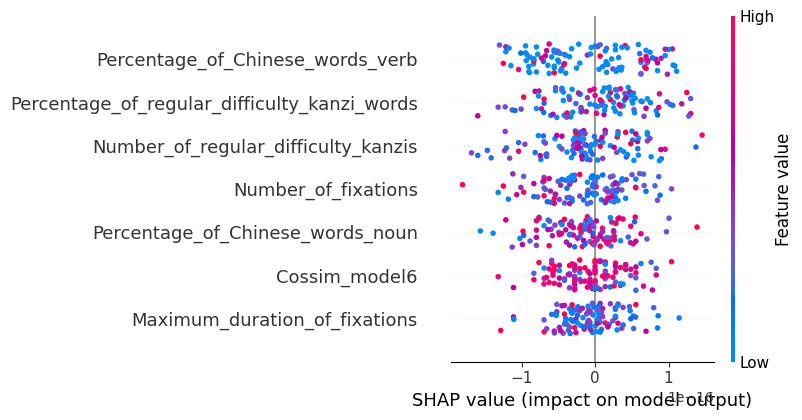

Using 110 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 110/110 [00:06<00:00, 17.35it/s]


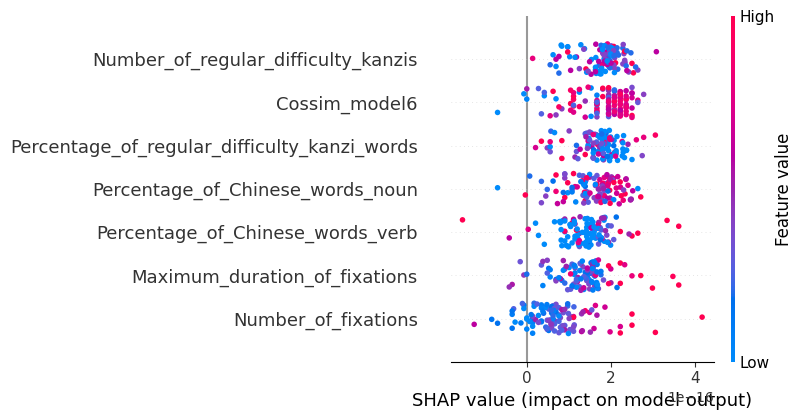

Using 110 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 110/110 [00:06<00:00, 17.65it/s]


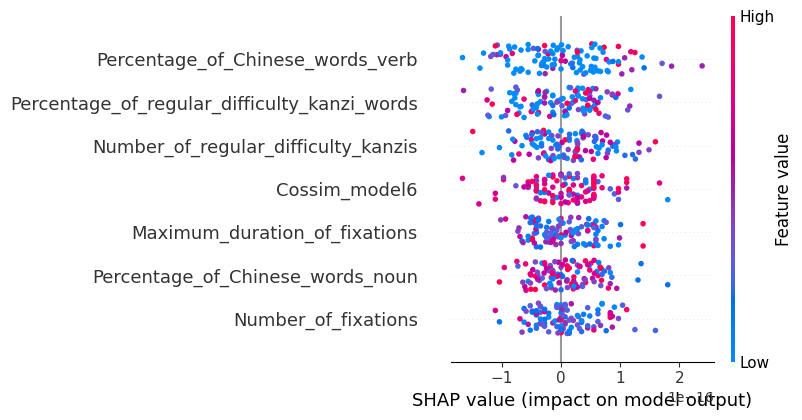

Using 110 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 110/110 [00:04<00:00, 23.72it/s]


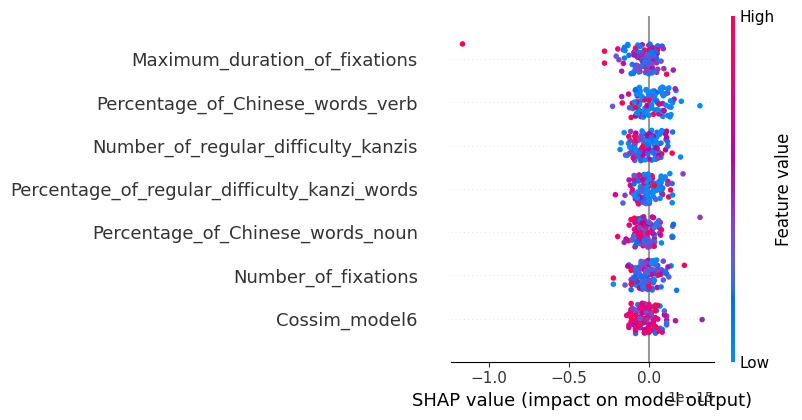

Model log
  Maximum_duration_of_fixations: 6.3760944125533896e-18
  Number_of_fixations: 8.518379341550883e-18
  Percentage_of_regular_difficulty_kanzi_words: -4.6932401541466275e-18
  Number_of_regular_difficulty_kanzis: 1.4870818433977316e-17
  Percentage_of_Chinese_words_verb: 2.1589914988371574e-17
  Percentage_of_Chinese_words_noun: 1.5381625502968783e-17
  Cossim_model6: 7.900876922403458e-18
Model rf
  Maximum_duration_of_fixations: -1.0093429406670735e-17
  Number_of_fixations: -2.657280960928109e-17
  Percentage_of_regular_difficulty_kanzi_words: -8.53642884362692e-18
  Number_of_regular_difficulty_kanzis: -1.752070710736575e-17
  Percentage_of_Chinese_words_verb: 1.3286774419017529e-17
  Percentage_of_Chinese_words_noun: -1.2333169326399596e-17
  Cossim_model6: -7.258240725621141e-18
Model gb
  Maximum_duration_of_fixations: -2.2739292495998536e-18
  Number_of_fixations: -1.3442135662143009e-17
  Percentage_of_regular_difficulty_kanzi_words: -1.000225786034809e-17
  Number_of

In [108]:


SHAPs = {}
for name, model in random_search.best_estimator_.estimators:
    explainer = shap.KernelExplainer(model.predict_proba, X_train_scaled)
    shap_values = explainer.shap_values(X_train_scaled)
    shap_importances = np.mean(shap_values, axis=(0, 2))
    shaps = {X_train.columns[i]: shap_importances[i] for i in range(len(X_train.columns))}
    # SHAPs[f'{name}'] = np.mean(shap_values, axis=(0, 2))
    shap.summary_plot(np.mean(shap_values, axis=2), X_train_scaled, feature_names=selected_features)
    SHAPs[f'{name}'] = shaps

# 結果を表示
for model_name, importances in SHAPs.items():
    print(f"Model {model_name}")
    for feature, importance in importances.items():
        print(f"  {feature}: {importance}")




In [109]:
# # グラフプロット用の関数
# def plot_feature_importance(Model):
#     for model_name, features in Model.items():
#         plt.figure(figsize=(10, 6))
#         names, values = zip(*sorted(features.items(), key=lambda x: x[1], reverse=True))
#         plt.barh(names, values, color='skyblue')
#         plt.title(f"Feature Importance for Model: {model_name}")
#         plt.xlabel("Permutation Importance")
#         plt.ylabel("Features")
#         plt.tight_layout()
#         plt.show()

# # グラフ描画
# plot_feature_importance(PFIs)


In [110]:
# # 結果の記録
# basemodel_names = [name for name, _ in base_models]

# import datetime
# currenttime = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

# """ Accuracy = accuracy_score(y_test, y_pred)
# Precision = precision_score(y_test, y_pred, average='weighted')
# Recall = recall_score(y_test, y_pred, average='weighted')
# F1_Score = f1_score(y_test, y_pred, average='weighted') """

# model_list = random_search.best_estimator_.estimators
# Models = {}
# for name, _ in model_list:
#     Models[f"{name}"] = f"{name}"



# result = {'Original Data shape': [X.shape],
#             'sfs_model' : [sfs_model],
#             'Models': [basemodel_names],
#             'Best number of features': len(sfs.k_feature_idx_),
#             'Slected Features': [selected_features],
#             'Model Params':[random_search.best_params_],
#             'Accuracy': accuracy_score(y_test, y_pred),
#             'Precision': precision_score(y_test, y_pred, average='weighted'),
#             'Recall': recall_score(y_test, y_pred, average='weighted'),
#             'F1_Score' : f1_score(y_test, y_pred, average='weighted'),
#             'Date': currenttime,
#             'Dataset' : file_path
#             }

# save_importances = {
#                     'model' : Models,
#                     'PFI' : PFIs,
#                     # 'SHAP' : SHAPs,
#                     'Date': currenttime
#                     }

# new_result = pd.DataFrame(result)
# new_result.to_csv('C:/WorkSpace/Practice/卒研B/result2.csv',
#                   mode='a',
#                   header=False,
#                   index=False)

# new_importances = pd.DataFrame(save_importances)
# new_importances.to_csv('C:/WorkSpace/Practice/卒研B/importances.csv',
#                   mode='a',
#                   header=True,
#                   index=False)

In [ ]:
# 結果の記録
basemodel_names = [name for name, _ in base_models]

import datetime
currenttime = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

""" Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred, average='weighted')
Recall = recall_score(y_test, y_pred, average='weighted')
F1_Score = f1_score(y_test, y_pred, average='weighted') """

model_list = random_search.best_estimator_.estimators
Models = {}
for name, _ in model_list:
    Models[f"{name}"] = f"{name}"



result = {'Original Data shape': [X.shape],
            'sfs' : sfs,
            'Models': [basemodel_names],
            'Best number of features': len(selected_features),
            'Slected Features': [selected_features],
            'Model Params':[random_search.best_params_],
            'Model Accuravy':[Model_accuracy],
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted'),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1_Score' : f1_score(y_test, y_pred, average='weighted'),
            'Date': currenttime,
            'Dataset' : file_path
            }

save_importances = {
                    'model' : Models,
                    'PFI' : PFIs,
                    'SHAP' : SHAPs,
                    'Date': currenttime
                    }

new_result = pd.DataFrame(result)
new_result.to_csv('C:/WorkSpace/Practice/卒研B/result4.csv',
                  mode='a',
                  header=False,
                  index=False)

new_importances = pd.DataFrame(save_importances)
new_importances.to_csv('C:/WorkSpace/Practice/卒研B/importances4.csv',
                  mode='a',
                  header=True,
                  index=False)

In [112]:
random_search.best_estimator_.estimators

[('log', LogisticRegression(C=2, max_iter=116, random_state=42, solver='sag')),
 ('rf',
  RandomForestClassifier(criterion='log_loss', max_depth=44,
                         min_samples_leaf=0.0804161308495439, n_estimators=81,
                         random_state=42)),
 ('gb',
  GradientBoostingClassifier(learning_rate=0.29908599312677586,
                             min_samples_leaf=4, n_estimators=142,
                             random_state=42, subsample=0.8056970192871818)),
 ('svm',
  SVC(C=67.12435168240506, gamma='auto', probability=True, random_state=42)),
 ('knn', KNeighborsClassifier(leaf_size=41, n_neighbors=2)),
 ('mlp',
  MLPClassifier(alpha=0.005668012624583502, hidden_layer_sizes=(100, 50),
                max_iter=153, random_state=42)),
 ('nb', GaussianNB(var_smoothing=5e-09))]

In [113]:
import time
for i in range(5):
    print(i)
    time.sleep(1)
!rundll32 user32.dll,MessageBeep

0
1
2
3
4


In [114]:
shap.plots.waterfall(shap_values[0], max_display=14)

TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.

In [39]:
explainer0 = shap.Explainer(random_search.best_estimator_.predict, X_train_scaled)
shap_values0 = explainer0(X_slected)

ExactExplainer explainer: 539it [13:43,  1.55s/it]                         


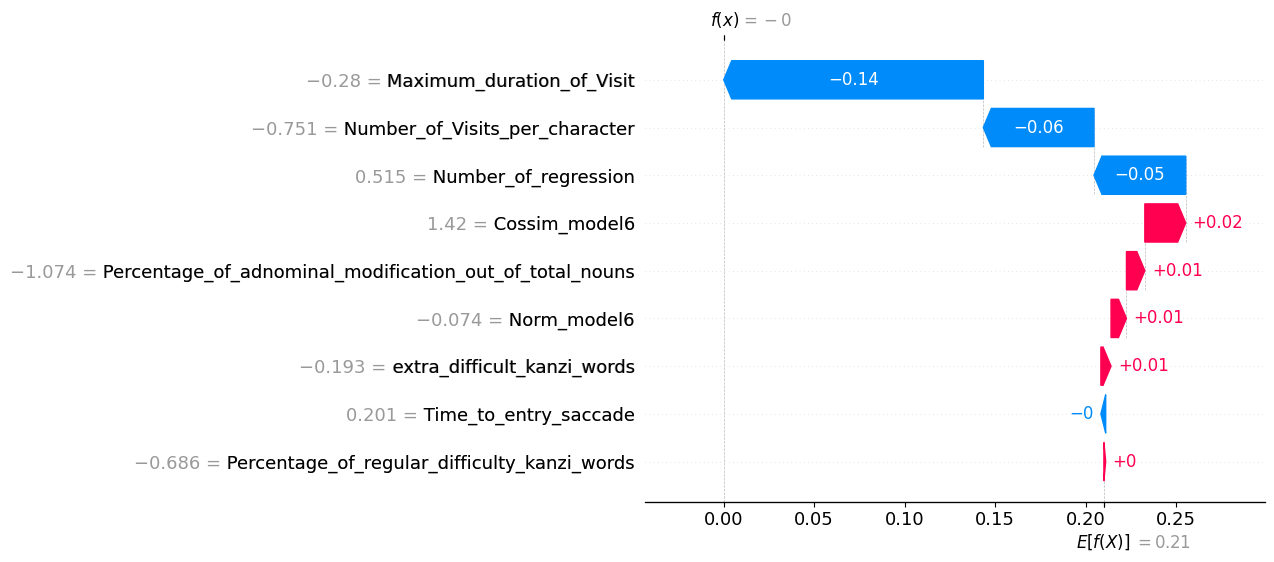

In [30]:
shap.plots.waterfall(shap_values0[10], max_display=14, )

In [35]:
random_search.best_estimator_.estimators[4]

('knn', KNeighborsClassifier(leaf_size=28))